In [100]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing, cross_validation, neighbors, svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, \
  RandomForestRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV

from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

from itertools import cycle

import pickle
DIR_DATA = "data"
DIR_PROCESSED = "processed"
LABEL = "rating"
NON_PREDICTORS = [LABEL]#, "name","anime_id"]
CV_FOLDS = 5

In [11]:
# HR_comma_sep.csv

# Employee satisfaction level
# Last evaluation
# Number of projects
# Average monthly hours
# Time spent at the company
# Whether they have had a work accident
# Whether they have had a promotion in the last 5 years
# Department
# Salary
# Whether the employee has left

In [12]:
hr = pd.read_csv(DIR_DATA + '/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
print('Percent who left: {:.2f}'.format(np.sum(hr.left) / len(hr.left) * 100))

Percent who left: 23.81


In [14]:
hr.sales = hr.sales.astype('category').cat.codes
hr.salary = hr.salary.astype('category').cat.codes
# hr.Work_accident = hr.Work_accident.astype('category')
# hr.promotion_last_5years = hr.promotion_last_5years.astype('category')
# hr.left = hr.left.astype('category')


In [15]:
hr.salary.dtype

dtype('int8')

In [16]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [17]:
def predict_left(df, clf, test_size=0.2):
    X = df.drop(['left'],1)
    y = df.left 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    print('Training Score: {:.3f}'.format(clf.score(X_train, y_train)))
    print('Testing Score: %.3f' % (clf.score(X_test, y_test)))
    
    print()

In [18]:
classifiers = [RandomForestClassifier(n_jobs=-1), RandomForestClassifier(criterion='entropy', n_jobs=-1), svm.SVC(), LogisticRegressionCV(), LinearRegression(), AdaBoostClassifier(), xgb.XGBClassifier(), neighbors.KNeighborsClassifier(n_jobs=-1)] #, GradientBoostingClassifier(),  neighbors.KNeighborsClassifier(n_jobs=-1)]
# classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1), xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    predict_left(hr, clf)

Classifier  0
Training Score: 0.998
Testing Score: 0.986

Classifier  1
Training Score: 0.998
Testing Score: 0.992

Classifier  2
Training Score: 0.961
Testing Score: 0.951

Classifier  3
Training Score: 0.778
Testing Score: 0.766

Classifier  4
Training Score: 0.194
Testing Score: 0.194

Classifier  5
Training Score: 0.961
Testing Score: 0.955

Classifier  6
Training Score: 0.976
Testing Score: 0.978

Classifier  7
Training Score: 0.953
Testing Score: 0.932



In [19]:
def cross_val_left(hr, clf, cv_folds=CV_FOLDS, drop=['left']):
    X = hr.drop(drop, 1)#, 'sales', 'salary'],1)
    y = hr.left 
    scores = cross_val_score(clf, X, y, cv=cv_folds, n_jobs=-1)
    
    
    
    print('Cross val score: ', sum(scores) / cv_folds )
    print(scores)
    
    print()
    

In [20]:
classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1)]#, svm.SVC()]#xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    cross_val_left(hr, clf)

Classifier  0
Cross val score:  0.991999666511
[ 0.99900033  0.981       0.986       0.99933311  0.99466489]

Classifier  1
Cross val score:  0.991866333163
[ 0.99866711  0.981       0.986       0.99899967  0.99466489]



In [21]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = hr.drop(['left'],1)
y = hr.left 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
clf.fit(X_train, y_train)
print(X.columns)
clf.feature_importances_
# Drop all lower than 0.01 relevance

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


array([ 0.3334513 ,  0.11753635,  0.1840533 ,  0.14869921,  0.18876981,
        0.00600371,  0.00101214,  0.01219754,  0.00827664])

In [22]:
# Dropping all with <0.01 relevance seems to not affect score much (.9920->.9916)
drop = ['left', 'promotion_last_5years', 'Work_accident', 'sales', 'salary']
for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    cross_val_left(hr, clf, drop=drop)

Classifier  0
Cross val score:  0.991532955356
[ 0.99833389  0.98033333  0.98633333  0.99833278  0.99433144]

Classifier  1
Cross val score:  0.991466222015
[ 0.99866711  0.981       0.98566667  0.99833278  0.99366455]



In [23]:
hr.corr()["left"]

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
sales                    0.032105
salary                  -0.001294
Name: left, dtype: float64

In [33]:
# Drop everything with corr to left of < 0.005
# Makes it worse
drop = ['left',  'sales', 'salary']
classifiers = [RandomForestClassifier(n_estimators=500 ,n_jobs=-1), RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1)]#, svm.SVC()]#xgb.XGBClassifier(n_estimators=500, nthread=-1)]# svm.SVC()]

for i, clf in enumerate(classifiers):
    print('Classifier ', i)
    
    cross_val_left(hr, clf, drop=drop)

Classifier  0
Cross val score:  0.991732955356
[ 0.99833389  0.98133333  0.98633333  0.99833278  0.99433144]

Classifier  1
Cross val score:  0.99173295537
[ 0.99866711  0.981       0.986       0.99866622  0.99433144]



In [34]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
clf = RFE(model,7 )

X = hr.drop(['left'],1)
y = hr.left 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
clf.fit(X_train, y_train)
print(clf.support_)
print(clf.ranking_)
# Gets same result as feature_importance, which makes sense

[ True  True  True  True  True False False  True  True]
[1 1 1 1 1 2 3 1 1]


In [26]:
# from sklearn.feature_selection import RFE
# model = svm.SVC(kernel='linear')
# clf = RFE(model,5 )

# X = hr.drop(['left'],1)
# y = hr.left 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
# clf.fit(X_train, y_train)
# print(clf.support_)
# print(clf.ranking_)
# # Gets same result as feature_importance

In [129]:
# PCA on relevant features
drop = ['left',  'sales', 'salary']

y = np.array(hr.left)

X = np.array(hr.drop(drop,1))
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

In [130]:
print(pca.components_)

[[ -1.00023273e-04   1.16454622e-03   1.03016962e-02   9.99939260e-01
    3.73903652e-03  -7.14279278e-05  -1.02210933e-05]
 [ -2.15563235e-02   1.53851479e-02   2.72466874e-01  -6.42326612e-03
    9.61758360e-01   7.45692132e-04   6.28225738e-03]]


In [131]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[  9.98565340e-01   8.69246970e-04]
0.999434587329


In [132]:
# Still get good accuracy, ~97%
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
y = np.array(hr.left) 

scores = cross_val_score(clf, X_pca, y, cv=CV_FOLDS, n_jobs=-1)
    
    
    
print('Cross val score: ', sum(scores) / CV_FOLDS )
print(scores)

Cross val score:  0.971266287756
[ 0.97734089  0.95066667  0.95666667  0.98466155  0.98699567]


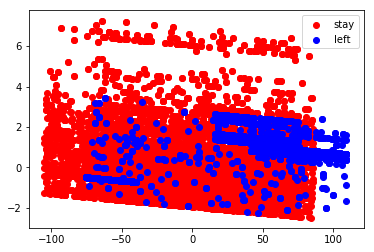

In [133]:
colors = cycle('rb')
target_ids = range(2)
plt.figure()
for i, c, label in zip(target_ids, colors, ["stay","left"]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label)
plt.legend()
plt.show()

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


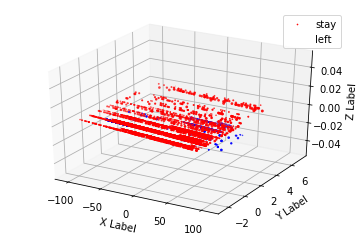

In [121]:
# 3D PCA, Clear plane difference between them
drop = ['left',  'sales', 'salary']

y = np.array(hr.left)

X = np.array(hr.drop(drop,1))
pca = PCA(n_components=3).fit(X)
X_pca = pca.transform(X)

colors = cycle('rb')
target_ids = range(2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, c, label in zip(target_ids, colors, ["stay","left"]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],X_pca[y == i, 2],
                c=c, label=label)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
    
plt.legend()
plt.show()

In [122]:
# 3D accuracy is the same as 2D
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
y = hr.left 

scores = cross_val_score(clf, X_pca, y, cv=CV_FOLDS, n_jobs=-1)
    
    
    
print('Cross val score: ', sum(scores) / CV_FOLDS )
print(scores)

Cross val score:  0.970666398815
[ 0.97534155  0.94866667  0.958       0.98366122  0.98766255]
